<a href="https://colab.research.google.com/github/benasphy/Logistic-Regression/blob/main/Logistic_Regression_From_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
class Logistic_Regression_From_Scratch:
  def __init__(self, learning_rate, n_iters):
    self.lr = learning_rate
    self.n_iters = n_iters
    self.weights = None
    self.bias = None
    self.losses = []

  def _sigmoid(self, z):
    return 1 / (1 + np.exp(-z))

  def fit(self, X, y):
    X = np.array(X)
    y = np.array(y)

    n_samples, n_features = X.shape
    self.weights = np.zeros(n_features)
    self.bias = 0

    for _ in range(self.n_iters):
      linear_output = np.dot(X, self.weights) + self.bias
      y_pred = self._sigmoid(linear_output)

      dw = (2/n_samples) * np.dot(X.T, (y_pred - y))
      db = (2/n_samples) * np.sum(y_pred - y)

      self.weights -= self.lr * dw
      self.bias -= self.lr * db
      loss = (-1/n_samples) * np.sum(y * np.log(y_pred + 1e-9) + (1-y) * np.log(1-y_pred + 1e-9))
      self.losses.append(loss)

  def pred_proba(self, X):
    X = np.array(X)
    return self._sigmoid(np.dot(X, self.weights) + self.bias)

  def predict(self, X):
    y_pred_proba = self.pred_proba(X)
    return np.where(y_pred_proba >= 0.5, 1, 0)

  def evaluate(self, X, y):
    y_pred = self.predict(X)
    acc = np.mean(y_pred == y)
    return acc


In [15]:
data = {
    'x1': [0.1, 1.3, 2.1, 2.9, 3.5, 4.2, 5.1, 5.9, 6.8, 7.4],
    'x2': [1.2, 1.8, 2.5, 3.1, 3.9, 4.5, 5.2, 5.8, 6.5, 7.2],
    'y':  [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
}
df = pd.DataFrame(data)

X = df[['x1', 'x2']]
y = df['y']

In [24]:
model = Logistic_Regression_From_Scratch(learning_rate=0.01, n_iters=1000)
model.fit(X, y)

In [25]:
predictions = model.predict(X)
predictions

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [26]:
acc = model.evaluate(X, y)
print(model.weights)
print(model.bias)
print(acc)

[ 1.18114654 -0.5134276 ]
-2.087162828941949
0.9


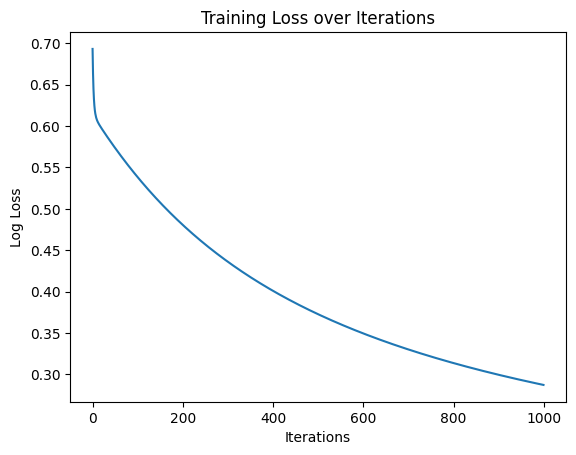

In [28]:
# Plot loss curve
plt.plot(model.losses)
plt.title("Training Loss over Iterations")
plt.xlabel("Iterations")
plt.ylabel("Log Loss")
plt.show()